In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

In [213]:
df = pd.read_csv("chaiyo22.csv",index_col=0)
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.0,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
22,25650621ULMB00060,20000.0,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.0,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.0,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 43073
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Application Number             1864 non-null   object 
 1   Principal Approve Amount       1864 non-null   float64
 2   Principal Amount               1864 non-null   float64
 3   Repayment Tenor Month Number   1864 non-null   int64  
 4   Gender                         1864 non-null   object 
 5   DOB                            1864 non-null   object 
 6   Occupation Description         1864 non-null   object 
 7   Total Income Amount (Month)    1864 non-null   float64
 8   Collateral Type Code           1864 non-null   object 
 9   Vehicle Brand                  1864 non-null   object 
 10  Vehicle Model                  1864 non-null   object 
 11  Vehicle Release Year           1864 non-null   int64  
 12  Vehicle Sub Model              1864 non-null   

In [215]:
df.describe()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000
mean,76810.597575,71985.642597,39.360515,19125.826878,2012.683476,115293.401288,39.884120,10.316524
std,85698.602791,82792.986690,21.744277,7724.855463,5.089392,124545.856214,10.159727,5.089392
min,3000.000000,0.000000,12.000000,6500.000000,1994.000000,10000.000000,21.000000,1.000000
25%,21300.000000,19189.997500,24.000000,14000.000000,2010.000000,34000.000000,32.000000,6.000000
50%,29200.000000,28253.540000,36.000000,17931.500000,2013.000000,42000.000000,39.000000,10.000000
75%,130000.000000,117353.362500,60.000000,24000.000000,2017.000000,199125.000000,46.000000,13.000000
max,625000.000000,329947.720000,120.000000,40590.000000,2022.000000,894500.000000,72.000000,29.000000


In [216]:
cal_Q1 = df["Principal Amount"].quantile(0.25)
cal_Q3 = df["Principal Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

98163.365

In [217]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -128055.05000000002 upper: 264598.41000000003


<AxesSubplot:>

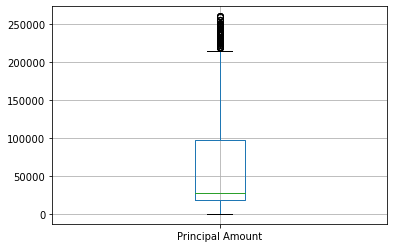

In [218]:
df = df[(df['Principal Amount'] > lower_limit) & (df['Principal Amount'] < upper_limit)]
df.boxplot(column=['Principal Amount'])

In [219]:
df['Principal Amount'].max()

260000.0

In [220]:
df['Principal Amount'].min()

0.0

<AxesSubplot:>

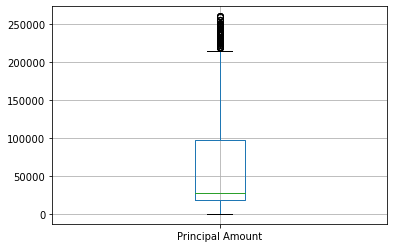

In [221]:
df = df[(df['Principal Amount'] > lower_limit) & (df['Principal Amount'] < upper_limit)]
df.boxplot(column=['Principal Amount'])

In [222]:
df['Principal Amount'].max()

260000.0

In [223]:
df['Principal Amount'].min()

0.0

In [224]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

9282.5

In [225]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -923.75 upper: 36206.25


<AxesSubplot:>

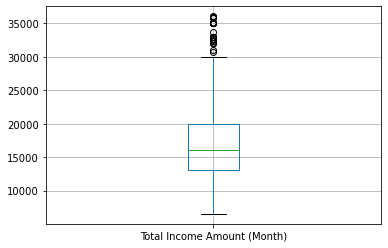

In [226]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [227]:
df['Total Income Amount (Month)'].max()

36070.0

In [228]:
df['Total Income Amount (Month)'].min()

6500.0

In [229]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00,1721.00
mean,65545.75,60916.96,37.82,18069.02,2012.65,99344.51,39.80,10.35
std,71825.97,68847.69,20.66,6596.50,5.17,106437.47,10.21,5.17
min,3000.00,0.00,12.00,6500.00,1994.00,10000.00,21.00,1.00
25%,20500.00,18540.35,24.00,13000.00,2010.00,33000.00,32.00,6.00
50%,28600.00,27329.84,36.00,16000.00,2013.00,41000.00,39.00,10.00
75%,100000.00,90000.00,48.00,20000.00,2017.00,167500.00,46.00,13.00
max,481000.00,260000.00,120.00,36070.00,2022.00,831000.00,72.00,29.00


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 43073
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Application Number             1721 non-null   object 
 1   Principal Approve Amount       1721 non-null   float64
 2   Principal Amount               1721 non-null   float64
 3   Repayment Tenor Month Number   1721 non-null   int64  
 4   Gender                         1721 non-null   object 
 5   DOB                            1721 non-null   object 
 6   Occupation Description         1721 non-null   object 
 7   Total Income Amount (Month)    1721 non-null   float64
 8   Collateral Type Code           1721 non-null   object 
 9   Vehicle Brand                  1721 non-null   object 
 10  Vehicle Model                  1721 non-null   object 
 11  Vehicle Release Year           1721 non-null   int64  
 12  Vehicle Sub Model              1721 non-null   

In [231]:
df.describe()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,65545.750872,60916.957263,37.823359,18069.019349,2012.650203,99344.509006,39.800116,10.349797
std,71825.966048,68847.687352,20.659818,6596.504953,5.173469,106437.468733,10.207249,5.173469
min,3000.000000,0.000000,12.000000,6500.000000,1994.000000,10000.000000,21.000000,1.000000
25%,20500.000000,18540.350000,24.000000,13000.000000,2010.000000,33000.000000,32.000000,6.000000
50%,28600.000000,27329.840000,36.000000,16000.000000,2013.000000,41000.000000,39.000000,10.000000
75%,100000.000000,90000.000000,48.000000,20000.000000,2017.000000,167500.000000,46.000000,13.000000
max,481000.000000,260000.000000,120.000000,36070.000000,2022.000000,831000.000000,72.000000,29.000000


In [232]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

7000.0

In [233]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 2500.0 upper: 30500.0


<AxesSubplot:>

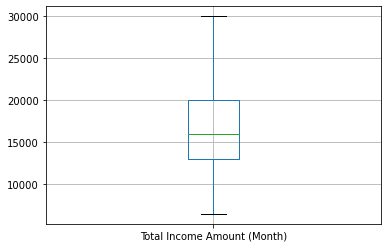

In [234]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [235]:
df['Total Income Amount (Month)'].min()

6500.0

In [236]:
df['Total Income Amount (Month)'].max()

30000.01

In [237]:
df.describe()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,64534.847980,59821.940268,37.623361,17656.630095,2012.678188,97811.918951,39.721692,10.321812
std,71134.915863,67970.733312,20.492330,6145.095492,5.167107,105697.002905,10.226272,5.167107
min,3000.000000,0.000000,12.000000,6500.000000,1994.000000,10000.000000,21.000000,1.000000
25%,20000.000000,18397.597500,24.000000,13000.000000,2010.000000,32500.000000,32.000000,6.000000
50%,28500.000000,27084.225000,36.000000,16000.000000,2013.000000,41000.000000,39.000000,10.000000
75%,100000.000000,84898.612500,48.000000,20000.000000,2017.000000,162750.000000,46.000000,13.000000
max,481000.000000,260000.000000,120.000000,30000.010000,2022.000000,831000.000000,72.000000,29.000000


In [238]:
df.head(2)

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.0,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
22,25650621ULMB00060,20000.0,18434.0,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4


##Drop Columns ที่ไม่ใช้

In [239]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [240]:
cols = ['Application Number','DOB','Vehicle Sub Model','Evaluation Amount','System CAR Code Date','Final CAR Code Previous Month','Application Status']
df = df.drop(columns=cols, axis=1)

In [241]:
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,System CAR Code (Daily),DPD,age,Vehicle Age
0,7500.00,0.00,12,M,พนักงานบริษัท,10000.0,PU,TOYOTA,SPORT CRUISER,2002,S1,PL,31,21
22,20000.00,18434.00,12,M,อื่นๆ,15000.0,MC,HONDA,WAVE 110I,2019,S2,NPL,29,4
59,165000.00,0.00,60,M,STREET VENDOR,30000.0,CAR,TOYOTA,VIOS,2010,S1,NPL,33,13
61,28000.00,26483.19,24,F,อื่นๆ,15000.0,MC,HONDA,DREAM 110,2015,S2,NPL,34,8
64,51000.00,50715.88,36,F,อื่นๆ,10000.0,MC,HONDA,PCX 150I,2018,S3,NPL,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41160,150000.00,150000.00,84,F,เกษตรกร,15000.0,PU,TOYOTA,HILUX TIGER,2003,S2,PL,53,20
42273,210000.00,210000.00,60,M,STREET VENDOR,20000.0,CAR,HONDA,CITY,2013,S2,PL,55,10
42439,189000.00,189000.00,72,F,พนักงานบริษัท,20620.0,CAR,TOYOTA,VIOS,2013,S2,PL,46,10
43069,31632.28,31632.28,48,F,อื่นๆ,10000.0,MC,HONDA,WAVE 110 I,2019,S2,PL,50,4


##แปลง Categorical เป็นตัวเลขด้วย LabelEncoder

In [242]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model','System CAR Code (Daily)']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [243]:
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,System CAR Code (Daily),DPD,age,Vehicle Age
0,7500.00,0.00,12,1,4,10000.0,2,16,124,2002,0,PL,31,21
22,20000.00,18434.00,12,1,8,15000.0,1,4,145,2019,1,NPL,29,4
59,165000.00,0.00,60,1,0,30000.0,0,16,142,2010,0,NPL,33,13
61,28000.00,26483.19,24,0,8,15000.0,1,4,41,2015,1,NPL,34,8
64,51000.00,50715.88,36,0,8,10000.0,1,4,98,2018,2,NPL,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41160,150000.00,150000.00,84,0,9,15000.0,2,16,64,2003,1,PL,53,20
42273,210000.00,210000.00,60,1,0,20000.0,0,4,19,2013,1,PL,55,10
42439,189000.00,189000.00,72,0,4,20620.0,0,16,142,2013,1,PL,46,10
43069,31632.28,31632.28,48,0,8,10000.0,1,4,144,2019,1,PL,50,4



#Decision Tree

##Create Train and test sets

In [244]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
       'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [245]:
from sklearn.model_selection import train_test_split

#feature_names = ['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']
#feature_names = ['Total Income Amount (Month)', 'Collateral Type Code', 'age', 'Vehicle Age']
feature_names = ['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year',
       'System CAR Code (Daily)', 'age', 'Vehicle Age']
X = df[feature_names]
y = df['DPD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) #แบ่ง test2% เพราะเรามีข้อมูลน้อย


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 43073
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Principal Approve Amount      1678 non-null   float64
 1   Principal Amount              1678 non-null   float64
 2   Repayment Tenor Month Number  1678 non-null   int64  
 3   Gender                        1678 non-null   int32  
 4   Occupation Description        1678 non-null   int32  
 5   Total Income Amount (Month)   1678 non-null   float64
 6   Collateral Type Code          1678 non-null   int32  
 7   Vehicle Brand                 1678 non-null   int32  
 8   Vehicle Model                 1678 non-null   int32  
 9   Vehicle Release Year          1678 non-null   int64  
 10  System CAR Code (Daily)       1678 non-null   int32  
 11  DPD                           1678 non-null   object 
 12  age                           1678 non-null   int64  
 13  Ve

In [247]:
X_train.shape

(1174, 13)

In [248]:
X_test.shape

(504, 13)

In [249]:
y_train.shape

(1174,)

In [250]:
y_test.shape

(504,)

##Apply Scalling[StandardScaler]

In [251]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Apply Scalling [MinMaxScaler]

In [252]:
'''from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'from sklearn.preprocessing import MinMaxScaler, StandardScaler\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [253]:
X_train #แปลงข้อมูลให้อยู่ในช่วง 0-1 จะได้ไม่ห่างกันมาก

array([[-0.72181659, -0.72839406, -1.26392808, ..., -0.95899775,
         1.52362265,  0.3084942 ],
       [-0.46743343, -0.41912455, -0.08704647, ...,  2.41690438,
         0.83031529, -1.60979068],
       [-0.52964671, -0.48461313, -0.08704647, ..., -0.95899775,
         0.83031529, -1.03430522],
       ...,
       [ 1.52339122,  1.67650991,  1.08983514, ...,  0.72895331,
        -0.95247507,  0.69215117],
       [-0.674811  , -0.63758658, -0.08704647, ..., -0.95899775,
         0.53318356,  0.50032268],
       [-0.84762564, -0.82750215, -1.26392808, ...,  0.72895331,
        -0.1601238 ,  1.65129361]])

In [254]:
X_test #แปลงข้อมูลให้อยู่ในช่วง 0-1 จะได้ไม่ห่างกันมาก

array([[-0.77435224, -0.75381527, -0.96970768, ..., -0.95899775,
        -0.55629943,  0.3084942 ],
       [ 0.47267821,  0.46978188, -0.08704647, ..., -0.95899775,
         1.62266656,  1.07580815],
       [-0.51582153, -0.47006011, -0.38126687, ...,  0.72895331,
        -1.3486507 , -1.22613371],
       ...,
       [ 2.5464539 , -0.8848211 ,  1.08983514, ..., -0.95899775,
         0.33509575, -0.65064824],
       [-0.45360826, -0.52953349, -1.26392808, ..., -0.95899775,
         0.03796402,  0.50032268],
       [-0.49508378, -0.46475612, -0.67548727, ..., -0.95899775,
         0.03796402,  1.8431221 ]])

K-Fold

##Build Models

In [255]:
df.to_csv('chaiyo_encode_data.csv')

In [256]:
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,System CAR Code (Daily),DPD,age,Vehicle Age
0,7500.00,0.00,12,1,4,10000.0,2,16,124,2002,0,PL,31,21
22,20000.00,18434.00,12,1,8,15000.0,1,4,145,2019,1,NPL,29,4
59,165000.00,0.00,60,1,0,30000.0,0,16,142,2010,0,NPL,33,13
61,28000.00,26483.19,24,0,8,15000.0,1,4,41,2015,1,NPL,34,8
64,51000.00,50715.88,36,0,8,10000.0,1,4,98,2018,2,NPL,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41160,150000.00,150000.00,84,0,9,15000.0,2,16,64,2003,1,PL,53,20
42273,210000.00,210000.00,60,1,0,20000.0,0,4,19,2013,1,PL,55,10
42439,189000.00,189000.00,72,0,4,20620.0,0,16,142,2013,1,PL,46,10
43069,31632.28,31632.28,48,0,8,10000.0,1,4,144,2019,1,PL,50,4


In [257]:
df.describe()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,System CAR Code (Daily),age,Vehicle Age
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,64534.847980,59821.940268,37.623361,0.435638,4.634088,17656.630095,0.989869,7.883194,94.529201,2012.678188,0.571514,39.721692,10.321812
std,71134.915863,67970.733312,20.492330,0.495988,3.487718,6145.095492,0.564729,5.746229,49.150348,5.167107,0.594608,10.226272,5.167107
min,3000.000000,0.000000,12.000000,0.000000,0.000000,6500.000000,0.000000,0.000000,0.000000,1994.000000,0.000000,21.000000,1.000000
25%,20000.000000,18397.597500,24.000000,0.000000,0.000000,13000.000000,1.000000,4.000000,50.000000,2010.000000,0.000000,32.000000,6.000000
50%,28500.000000,27084.225000,36.000000,0.000000,4.000000,16000.000000,1.000000,4.000000,111.000000,2013.000000,1.000000,39.000000,10.000000
75%,100000.000000,84898.612500,48.000000,1.000000,8.000000,20000.000000,1.000000,16.000000,144.000000,2017.000000,1.000000,46.000000,13.000000
max,481000.000000,260000.000000,120.000000,1.000000,10.000000,30000.010000,3.000000,18.000000,157.000000,2022.000000,2.000000,72.000000,29.000000


In [258]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train, y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [259]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Score: 76.38888888888889


In [260]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    model.fit(x_train, y_train)
    print("Accuracy is : ", model.score(x_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is ", np.mean(score)*100)

In [261]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is :  73.80952380952381
Cross Validation is  70.61780383795309


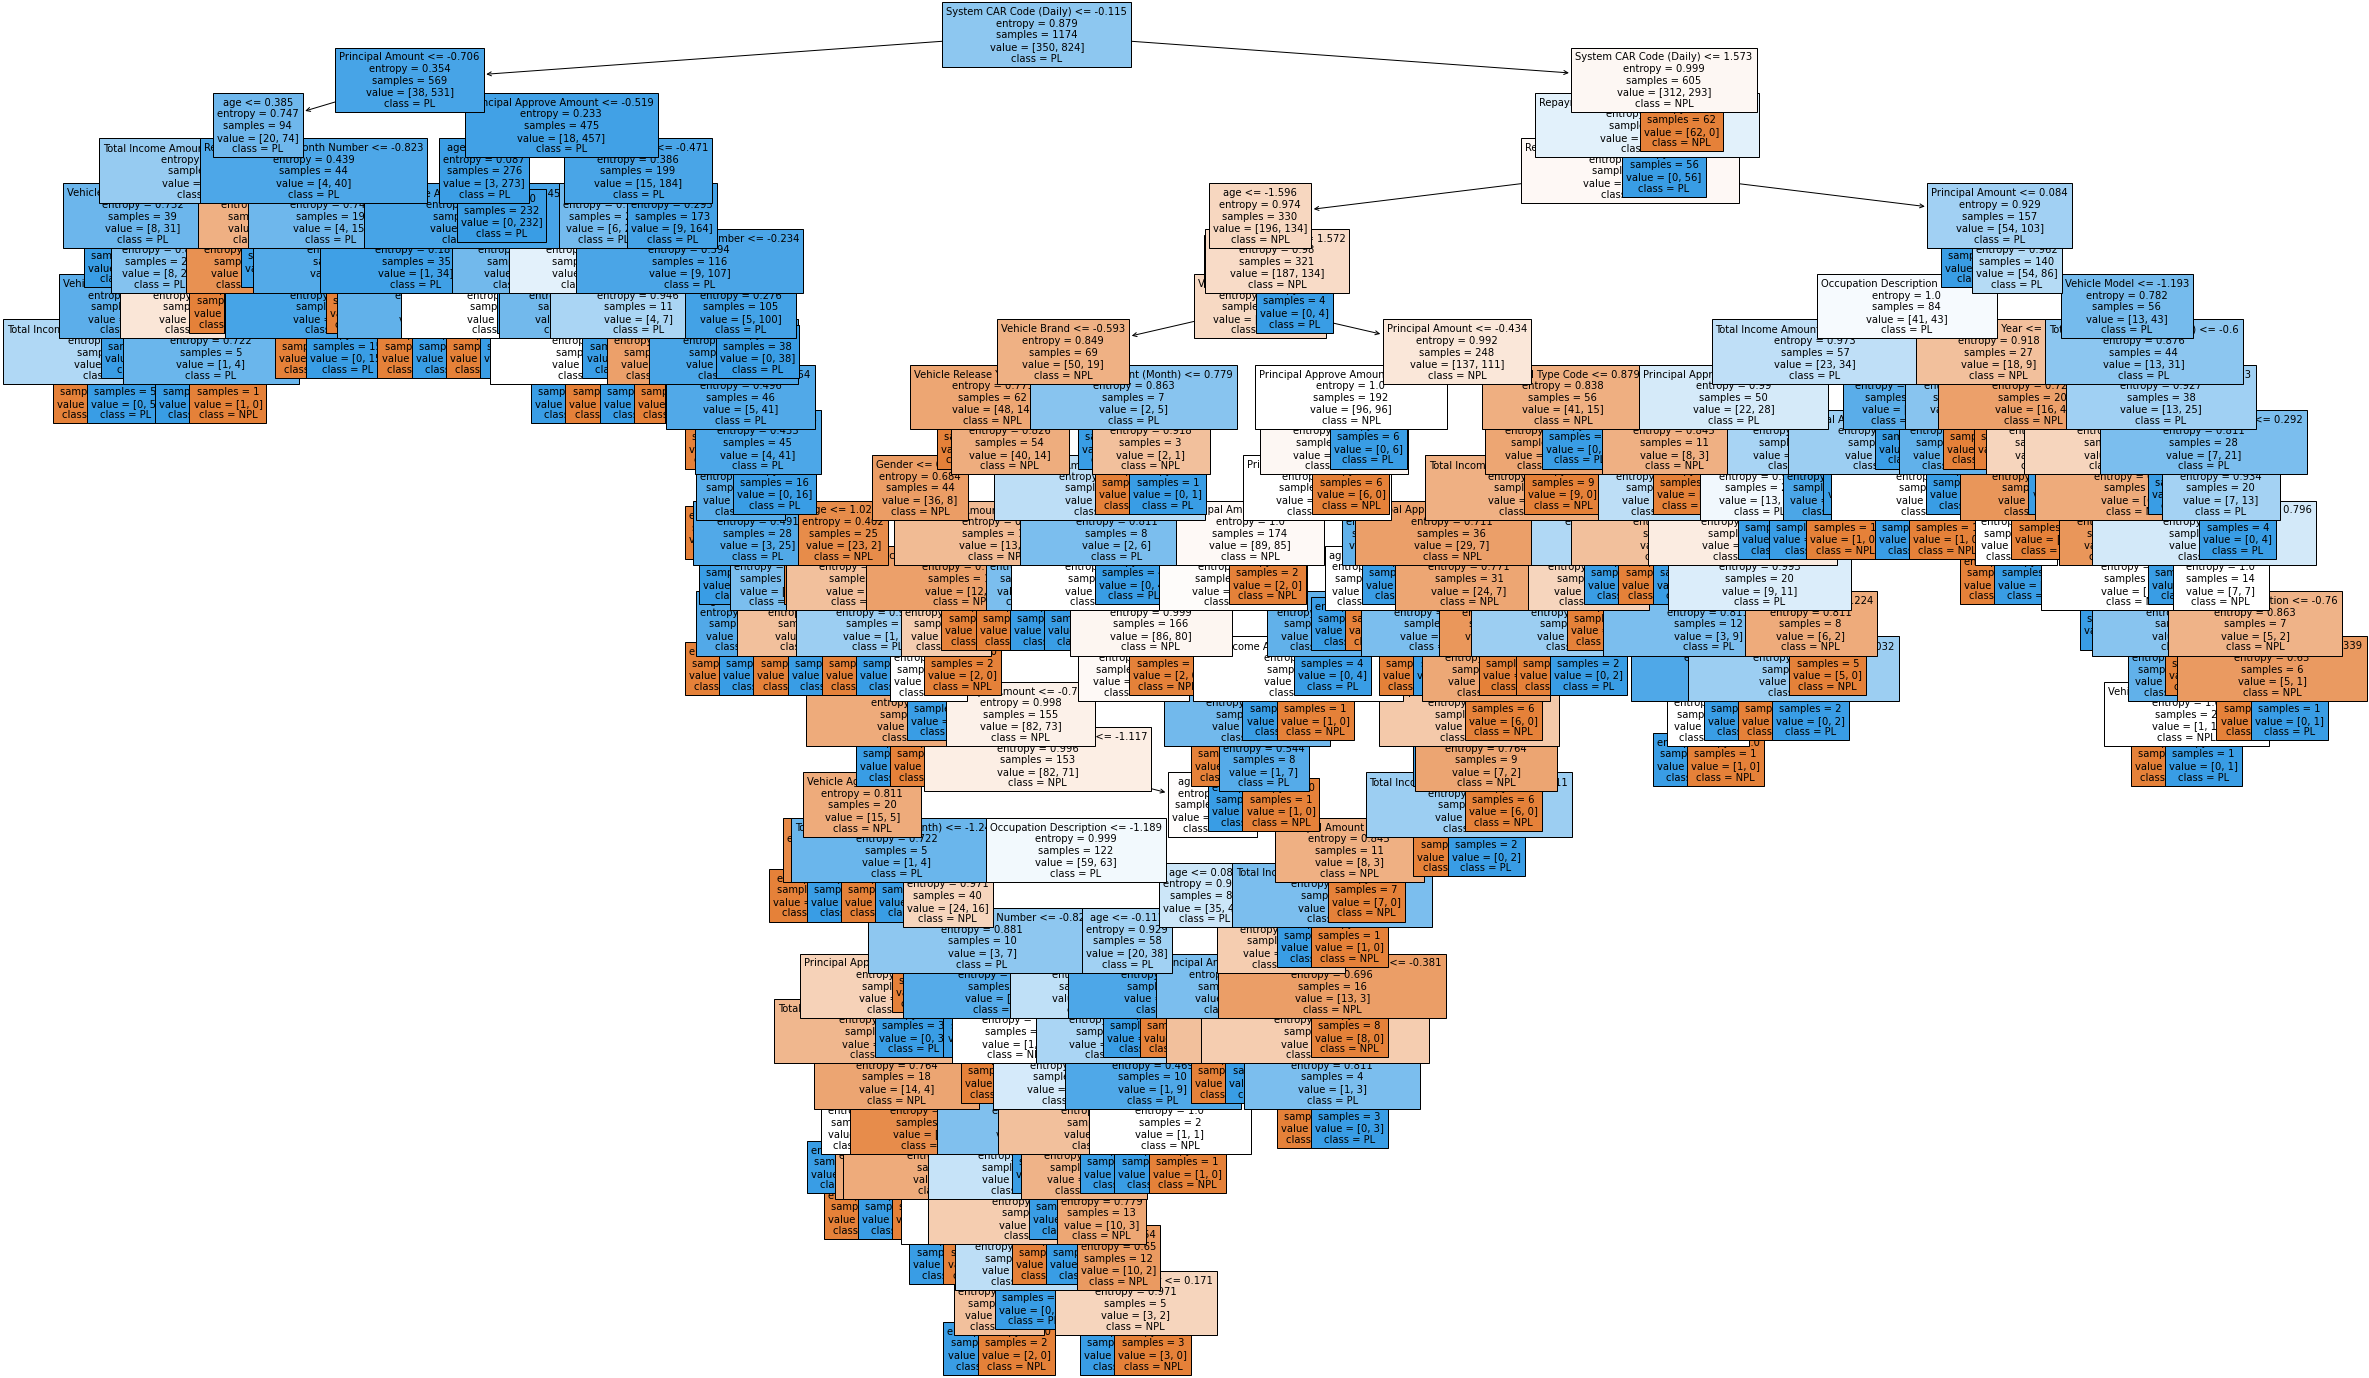

In [262]:
from sklearn import tree
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(classifier,
                   feature_names=feature_names,
                   class_names=['NPL','PL'], filled=True, fontsize=10)

###Pruning Decision Tree ปรับ Hyperparameter
1. **Criterion กำหนด** Gini index หรือ Information Gain
2. **Max_depth** กำหนดจำนวนชั้นของต้นไม้

In [263]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 81.54761904761905


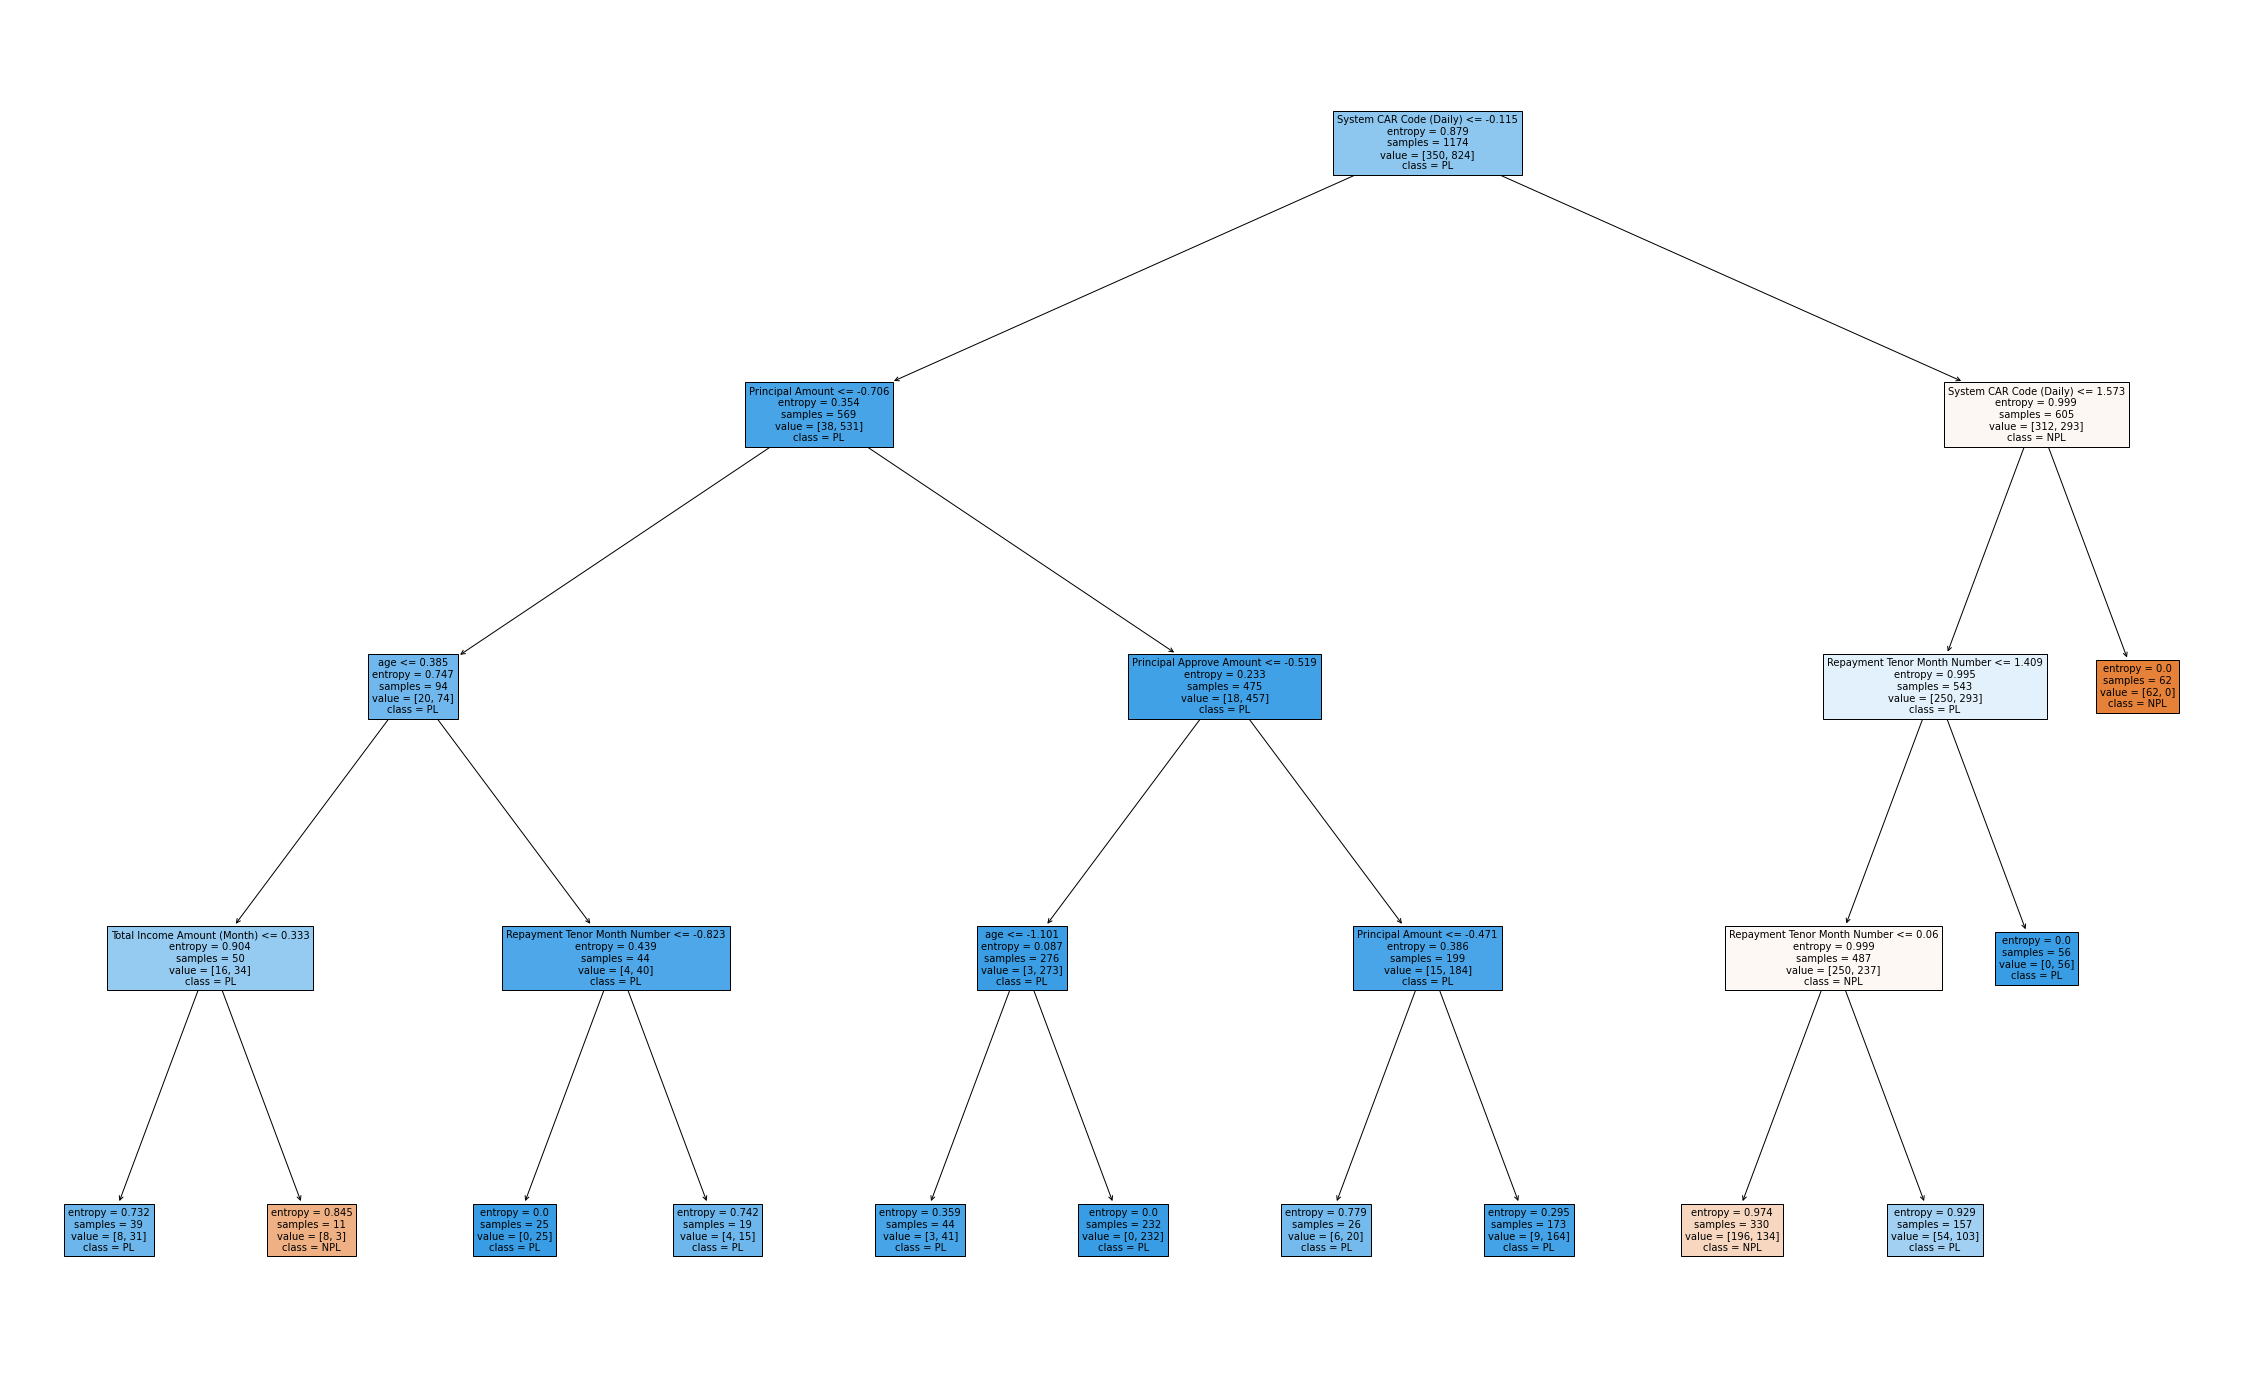

In [264]:
from sklearn import tree
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(classifier,
                   feature_names=feature_names,
                   class_names=['NPL','PL'], filled=True, fontsize=10)

In [265]:
#import graphviz

In [266]:
'''dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=feature_names,
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph'''

"dot_data = tree.export_graphviz(classifier, out_file=None,\n                                feature_names=feature_names,\n                                class_names=['NPL','PL'],\n                                filled=True, rounded=True,\n                                special_characters=True)\ngraph = graphviz.Source(dot_data)\ngraph"

###Confusion Matrix ใช้สำหรับวัดผล Binary Classification

*   Recall
*   Precision
*   Accuracy
*   F1-measure
*   and most importantly AUC-ROC Curve

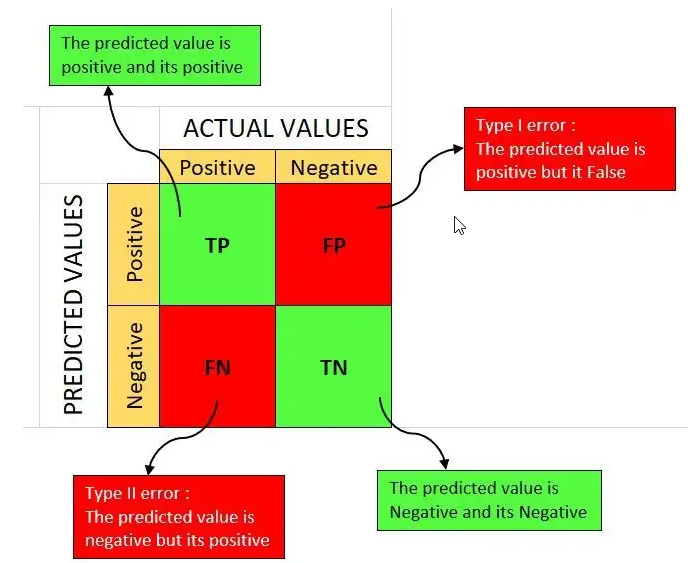




In [267]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[123  34]
 [ 59 288]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.68      0.78      0.73       157
          PL       0.89      0.83      0.86       347

    accuracy                           0.82       504
   macro avg       0.79      0.81      0.79       504
weighted avg       0.83      0.82      0.82       504



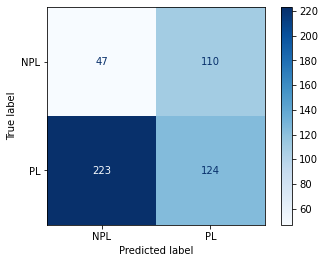

In [268]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

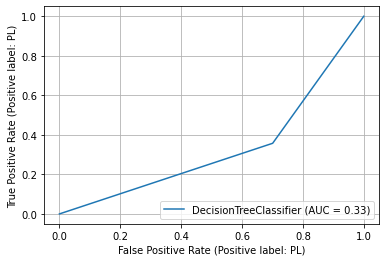

In [270]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.grid()